# Differential Equation to NN
A differential equation of 2nd order can be sepparated into two coupled differential equations of first order,

by doing this, we can represent each variable at time t by a neuron with time represented by depth

so  this jupyter notebook is build as a guide for the `integrate_data.py` scripts

## Data Generation
A differential equation can be first solved by a RK4 algorithm, with excelente precission, the data set corresponds of initial position and velocity, then the labels correspond the the final position and velocity.

RK4 in scipy:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.RK45.html

The equation that RK4 solves is in the form:

$$
\frac{dy}{dt} = f(y,t)
$$

In [21]:
from scipy.integrate import RK45
import matplotlib.pyplot as plt


def f(t, y):
    """function in the differential equation"""
    return -y*t

t0 = 0.0  # initial time
tf = 10.0  # final time
y0 = [1.0]  # initial condition
tol = 1e-6  # tolerance for error control

y_solution = []
t_array = []


solver = RK45(fun=f, t0=t0, y0=y0, t_bound=tf, rtol=tol, atol=tol)

y_solution.append(y0[0])
t_array.append(t0)
while solver.status == 'running':
    solver.step()
    y_solution.append(solver.y[0])
    t_array.append(solver.t)

if solver.status == 'finished':
    print(f"Solution: {solver.y[-1]:.6f}")
else:
    print("Solver failed to converge!")


Solution: 0.000001


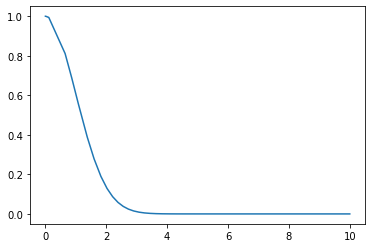

In [22]:
plt.plot(t_array, y_solution)


## 2. Second order equation
An easier one to visualize would be the classical harmonic oscillator

$$
\frac{d^2y}{dt^2} = - \omega^2 y
$$

but its second order, so we introduce a new variable, the velocity:

$$
v = \frac{dy}{dt}  \\ \frac{d v}{dt} = - \omega^2 y
$$

solve_ivp uses the RK45 method by default
https://docs.scipy.org/doc/scipy-1.9.0/reference/generated/scipy.integrate.solve_ivp.html


In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def f(t, z, omega):
    """function in the differential equation"""
    y, v = z
    dzdt = [v, -omega**2*y]
    return dzdt

t0 = 0.0  # initial time
tf = 10.0  # final time
z0 = [1.0, 0.0]  # initial condition: y=1, v=0
omega = 2.0  # frequency of oscillation
tol = 1e-6  # tolerance for error control

t_span = [t0, tf]
t_eval = np.linspace(t0, tf, 1000)


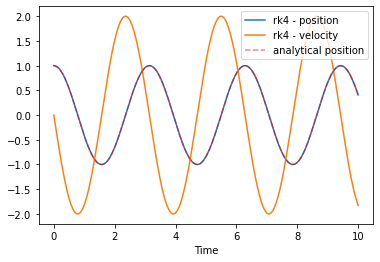

In [3]:
sol = solve_ivp(fun=lambda t, 
    z: f(t, z, omega), t_span=t_span, y0=z0, t_eval=t_eval, 
    rtol=tol, atol=tol, vectorized=True
    )

if sol.status == 0:
    y = sol.y[0] # position
    v = sol.y[1] # velocity
    plt.plot(sol.t, y, label='rk4 - position')
    plt.plot(sol.t, v, label='rk4 - velocity')
    plt.plot(sol.t, np.cos(omega*sol.t), 'r--',label='analytical position', alpha=0.5)
    plt.xlabel('Time')
    plt.legend()
    plt.show()
else:
    print('Solver failed to converge!')

In [31]:
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 470
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.01001001,  0.02002002,  0.03003003,  0.04004004,
        0.05005005,  0.06006006,  0.07007007,  0.08008008,  0.09009009,
        0.1001001 ,  0.11011011,  0.12012012,  0.13013013,  0.14014014,
        0.15015015,  0.16016016,  0.17017017,  0.18018018,  0.19019019,
        0.2002002 ,  0.21021021,  0.22022022,  0.23023023,  0.24024024,
        0.25025025,  0.26026026,  0.27027027,  0.28028028,  0.29029029,
        0.3003003 ,  0.31031031,  0.32032032,  0.33033033,  0.34034034,
        0.35035035,  0.36036036,  0.37037037,  0.38038038,  0.39039039,
        0.4004004 ,  0.41041041,  0.42042042,  0.43043043,  0.44044044,
        0.45045045,  0.46046046,  0.47047047,  0.48048048,  0.49049049,
        0.5005005 ,  0.51051051,  0.52052052,  0.53053053,  0.54054054,
        0.55055055,  0.560560